# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [2]:
# Installing the libraries with the specified version.
# pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.2.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [76]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
df = pd.read_csv('EasyVisa.csv')

## Data Overview

- Observations
- Sanity checks

In [5]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [7]:
df.isna().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [8]:
# 2 decimal places
pd.options.display.float_format = '{:.2f}'.format
print(df.describe().T)

                   count     mean      std     min      25%      50%  \
no_of_employees 25480.00  5667.04 22877.93  -26.00  1022.00  2109.00   
yr_of_estab     25480.00  1979.41    42.37 1800.00  1976.00  1997.00   
prevailing_wage 25480.00 74455.81 52815.94    2.14 34015.48 70308.21   

                      75%       max  
no_of_employees   3504.00 602069.00  
yr_of_estab       2005.00   2016.00  
prevailing_wage 107735.51 319210.27  


- __no_of_employees__ has a negative value (-26), which is unrealistic.
- __yr_of_estab__ has a minimum of 1800, which seems too old for a company.
- __prevailing_wage__ has a minimum of 2.14, which is really low.

- The median __yr_of_estab__ is around 1997, suggesting most companies in the dataset are relatively modern.
- However, there are outliers with establishment years much earlier than expected.

- The average wage is $74,455.81, but with a large spread (std: $52,815.94).
- The wage distribution likely has outliers (some very low or very high salaries).

In [9]:
print(df.describe(include='object').T)

                       count unique         top   freq
case_id                25480  25480   EZYV25480      1
continent              25480      6        Asia  16861
education_of_employee  25480      4  Bachelor's  10234
has_job_experience     25480      2           Y  14802
requires_job_training  25480      2           N  22525
region_of_employment   25480      5   Northeast   7195
unit_of_wage           25480      4        Year  22962
full_time_position     25480      2           Y  22773
case_status            25480      2   Certified  17018


- 67% (17,018 cases) of applications are Certified, while the rest are likely denied or pending.

In [10]:
df.nunique()

case_id                  25480
continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64

* We can drop 'case_id' as it is an ID variable

In [11]:
df.drop(['case_id'], axis=1, inplace=True)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [12]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    plt.title(feature, size=15)
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,  # Assign x variable to hue
        palette="Paired",
        order=data[feature].value_counts().index[:n],
        legend=False  # Hide legend
    )
    plt.title(feature, size=15)
    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    
    plt.show()  # show the plot

### Univariate analysis

- Wage needs to be standarized into only hour or year

In [14]:
conversion_factors = {
    'Hour': 2080,  # 40 hours/week * 52 weeks
    'Week': 52,    # 52 weeks in a year
    'Month': 12,   # 12 months in a year
    'Year': 1      # Already in yearly wages
}

# Apply conversion to prevailing_wage
df['prevailing_wage_yearly'] = df.apply(
    lambda row: row['prevailing_wage'] * conversion_factors[row['unit_of_wage']], axis=1
)

#### Numerical

In [15]:
# numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

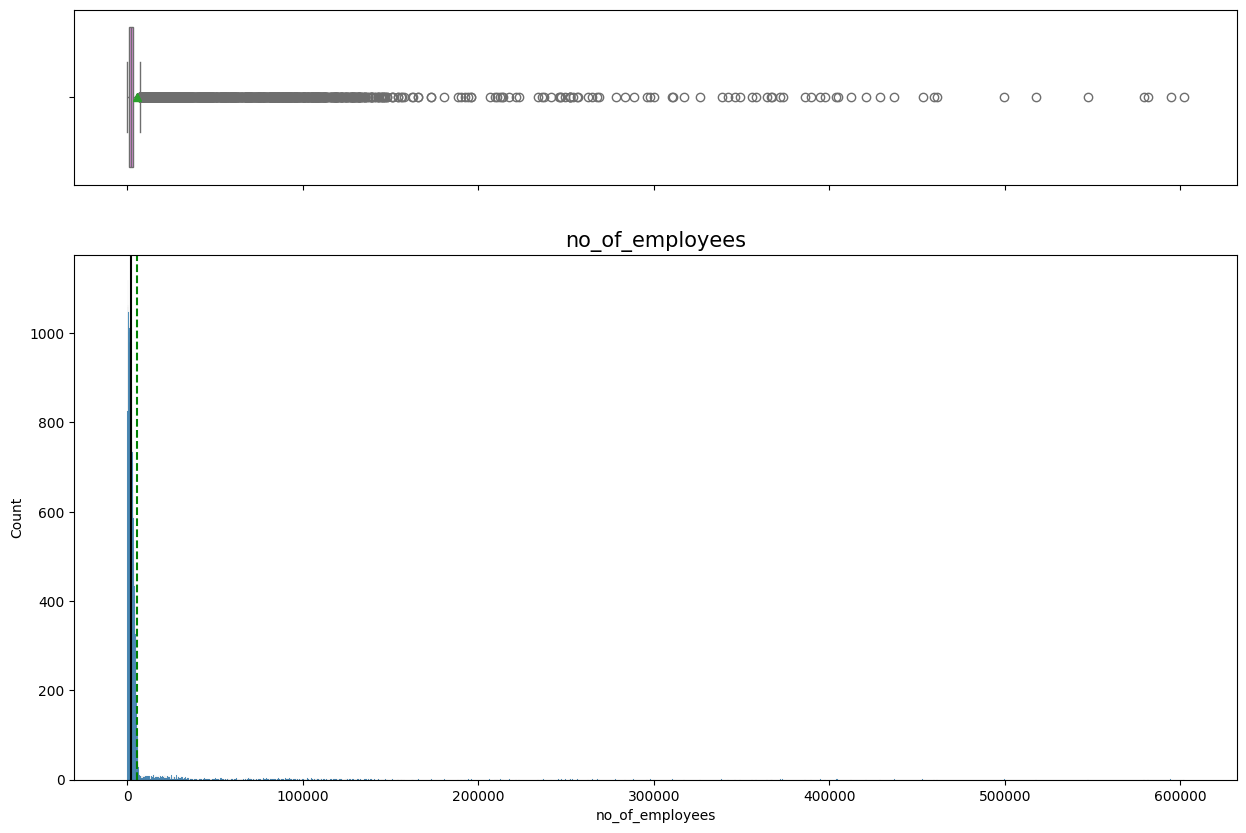

In [16]:
histogram_boxplot(df, numerical_cols[0])

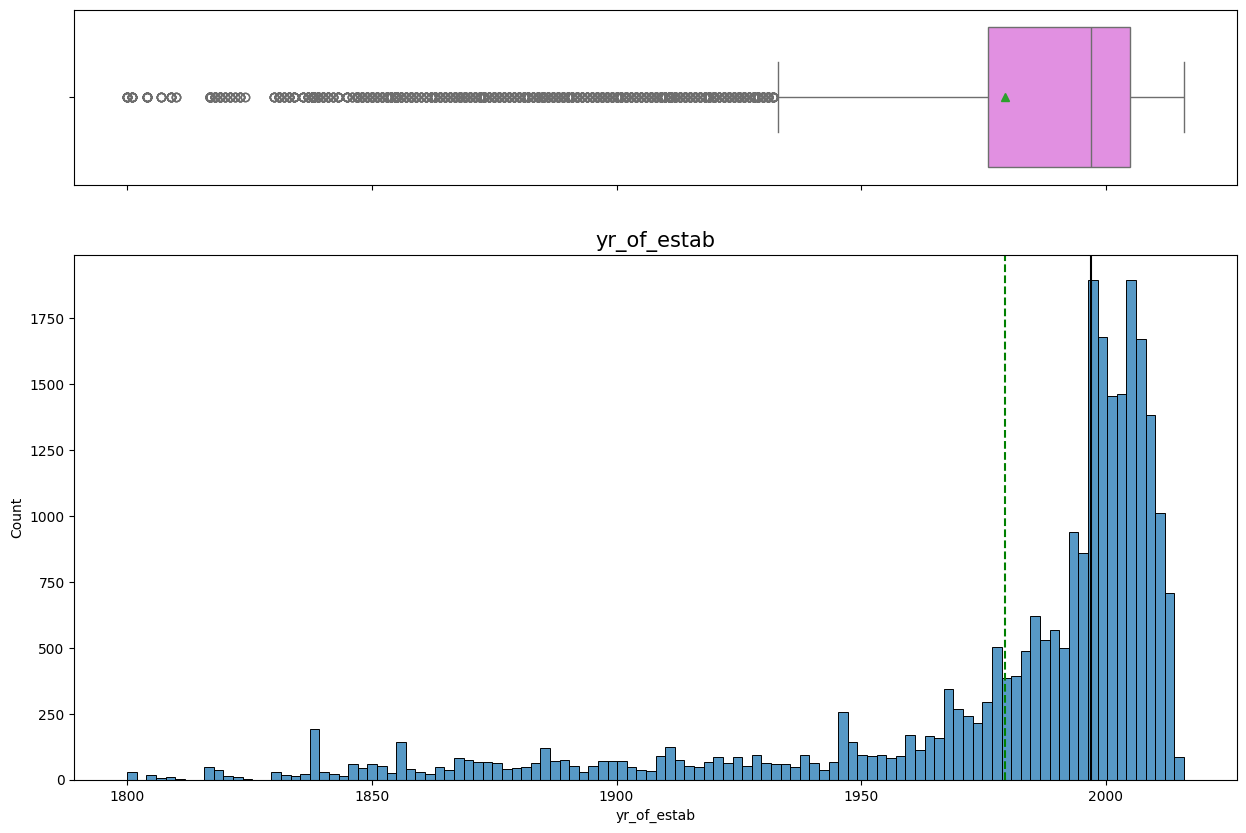

In [17]:
histogram_boxplot(df, numerical_cols[1])

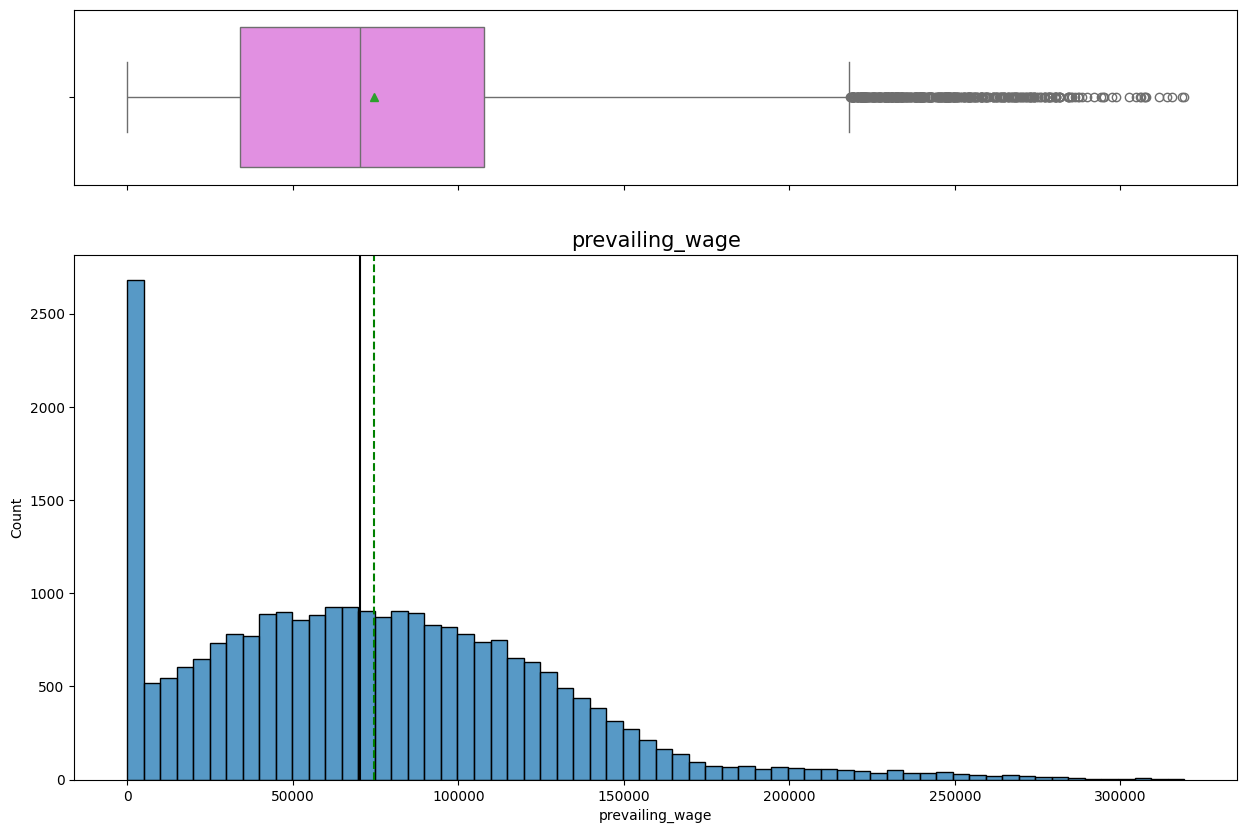

In [18]:
histogram_boxplot(df, numerical_cols[2])

#### Categorical

In [19]:
# categorical columns
categorical_cols = df.select_dtypes(include=object).columns.tolist()

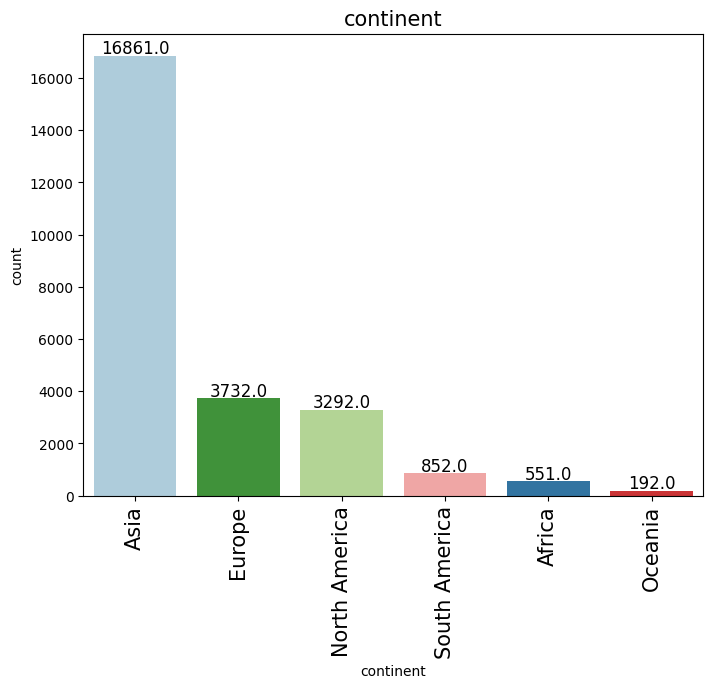

In [20]:
labeled_barplot(df, categorical_cols[0])

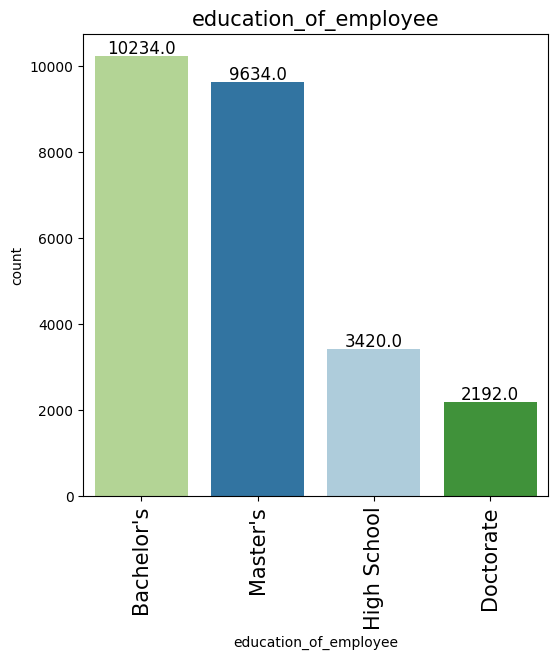

In [21]:
labeled_barplot(df, categorical_cols[1])

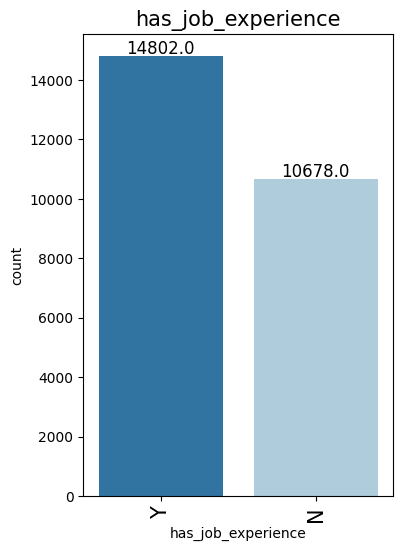

In [22]:
labeled_barplot(df, categorical_cols[2])

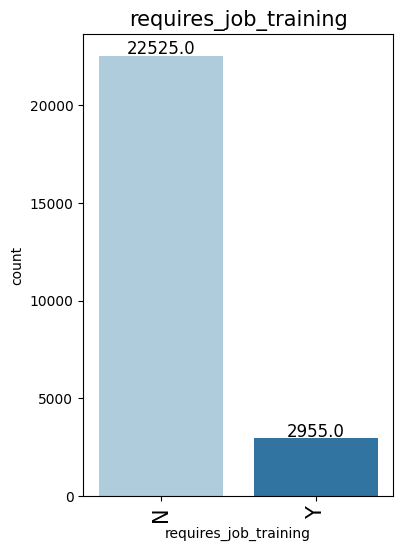

In [23]:
labeled_barplot(df, categorical_cols[3])

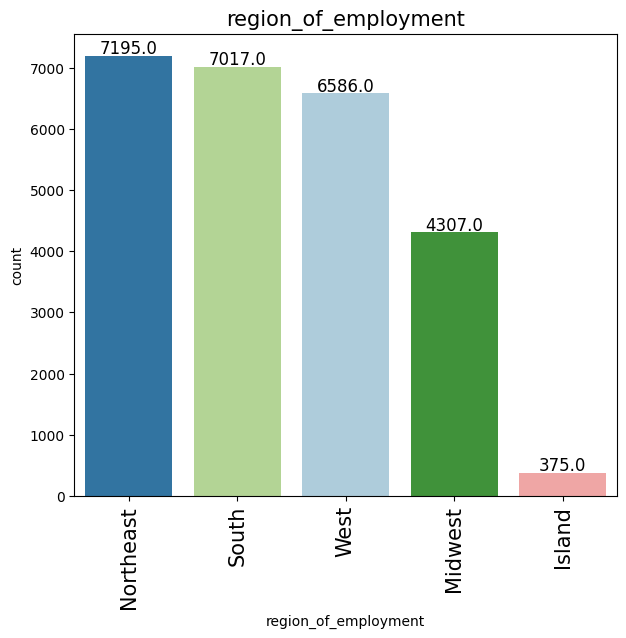

In [24]:
labeled_barplot(df, categorical_cols[4])

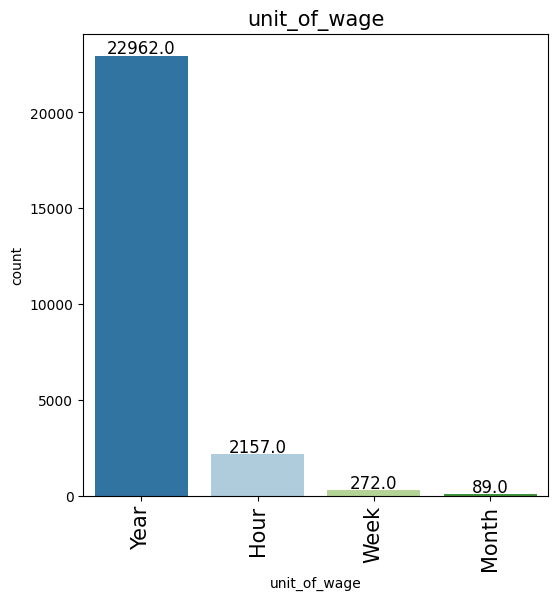

In [25]:
labeled_barplot(df, categorical_cols[5])

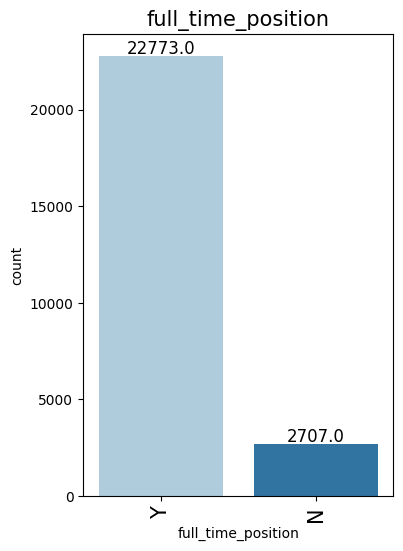

In [26]:
labeled_barplot(df, categorical_cols[6])

### Bivariate analysis

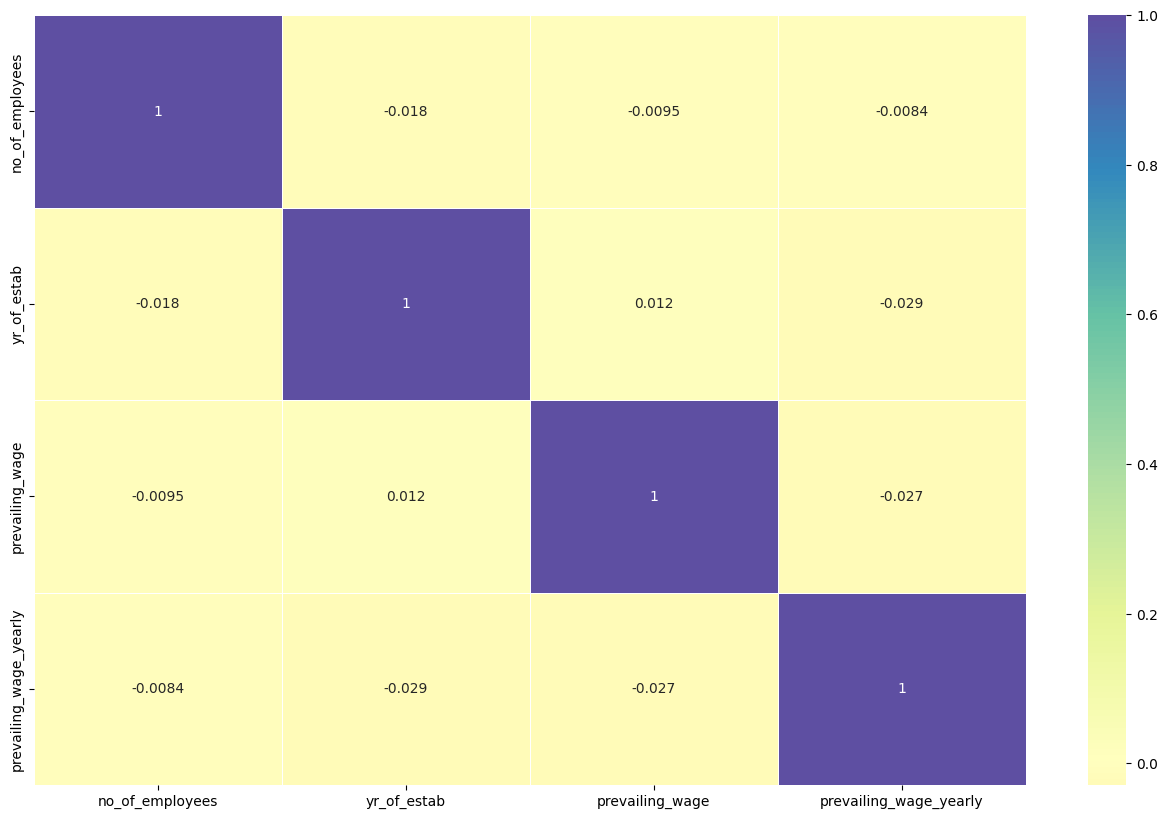

In [27]:
#sns.set_theme(rc={'figure.figsize':(16,10)})
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(numeric_only=True),
            annot=True,
            linewidths=.5,
            center=0,
            cmap="Spectral")
plt.show()

- Since no relevant correlation is found between the numeric variables next the binary variables will be included


In [28]:
binary_cols = df.nunique()[df.nunique() == 2].keys().tolist()

In [29]:
df_binary = df.copy()

In [30]:
for col in binary_cols:
    df_binary[col] = df_binary[col].map({'Y': 1, 'N': 0, 'Certified': 1, 'Denied': 0})

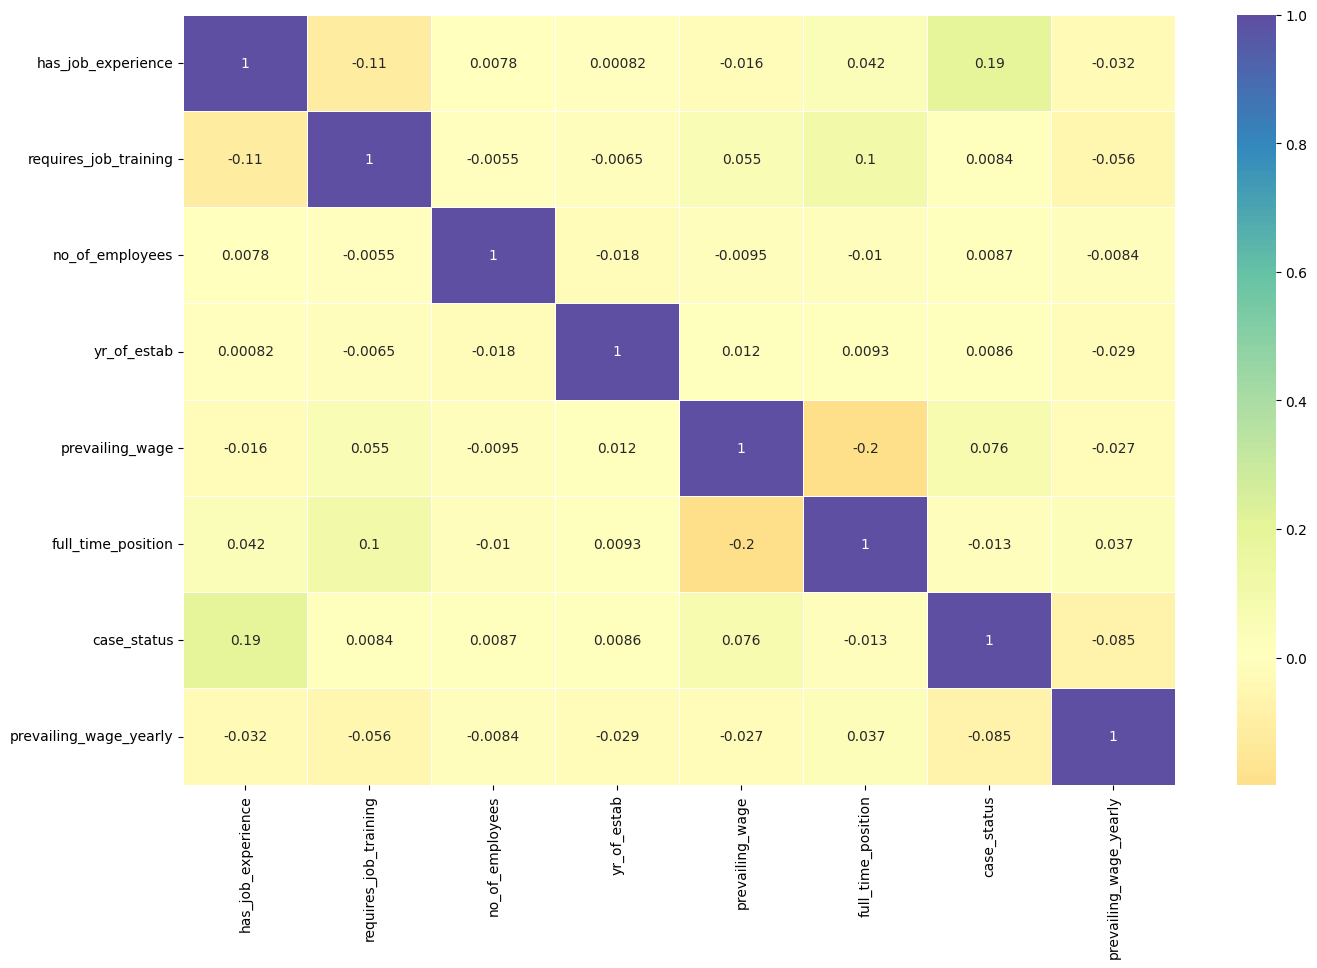

In [31]:
plt.figure(figsize=(16, 10))
sns.heatmap(df_binary.corr(numeric_only=True),
            annot=True,
            linewidths=.5,
            center=0,
            cmap="Spectral")
plt.show()

- Note:
1. Most Features Have Weak Correlation with case_status (Visa Approval)

        __has_job_experience__ has the highest correlation: 0.19 (weak positive relationship).
        __prevailing_wage__ has a slight negative correlation: -0.085.
        __full_time_position__ and __requires_job_training__ show almost no impact on visa approval.

2. __prevailing_wage__ Now Shows a Slight Negative Correlation with __Visa Approval__

        -0.085 suggests that higher wages might have a slightly lower chance of approval.
        This could be due to budget constraints or policy bias toward lower-wage positions.

3. __Job Experience__ Matters

        __has_job_experience__ (0.19) suggests that candidates with prior job experience are more likely to be approved.
        __requires_job_training__ has almost no effect (0.0084), meaning training requirements aren't a strong factor.

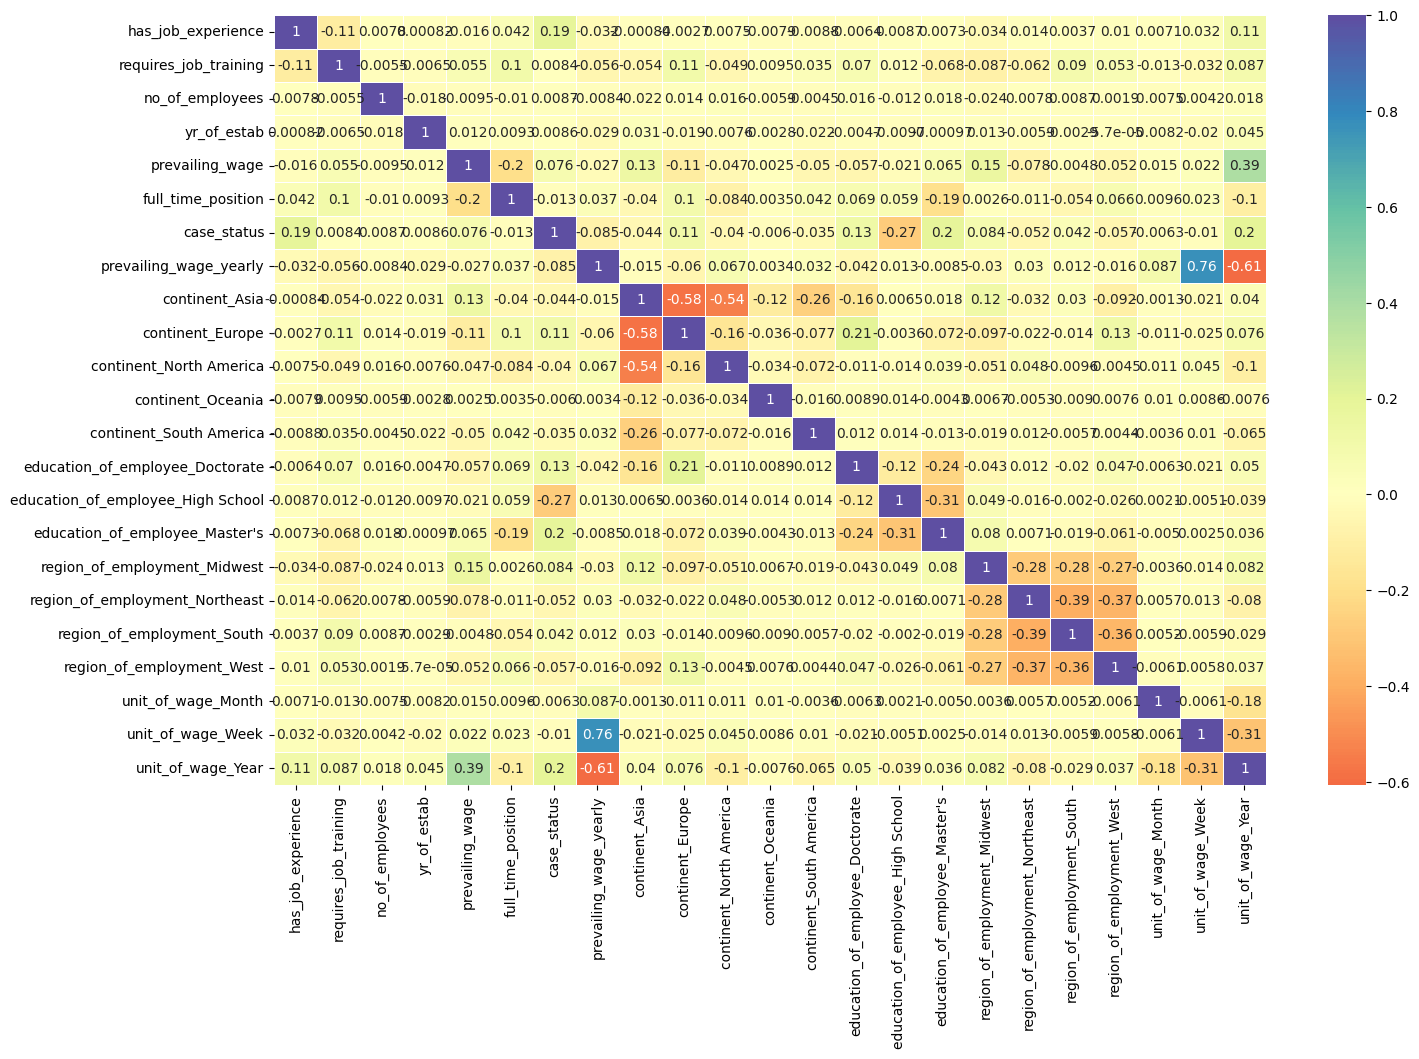

In [32]:
# Convert categorical variables to dummy variables
df_dummies = pd.get_dummies(df_binary, drop_first=True)

plt.figure(figsize=(16, 10))
sns.heatmap(df_dummies.corr(numeric_only=True),
            annot=True,
            linewidths=.5,
            center=0,
            cmap="Spectral")
plt.show()

1. Strong predictors

                positive impact : [has_job_experience]
                negative impact : [contient_Europe] [continent_North America] [education_of_employee_High School] [education_of_employee_Master's]

**Leading Questions**:




1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

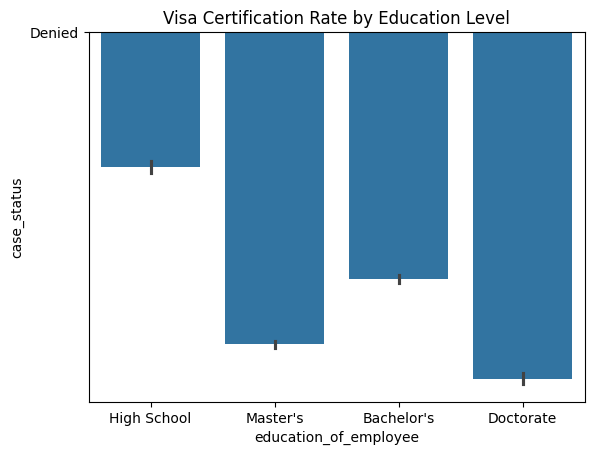

In [33]:
sns.barplot(x=df['education_of_employee'], y=df['case_status'])
plt.title("Visa Certification Rate by Education Level")
plt.show()

Yes. The bar chart shows that Doctorate and Master’s degrees have the highest certification rates, while High School has the lowest.

2. How does the visa status vary across different continents?

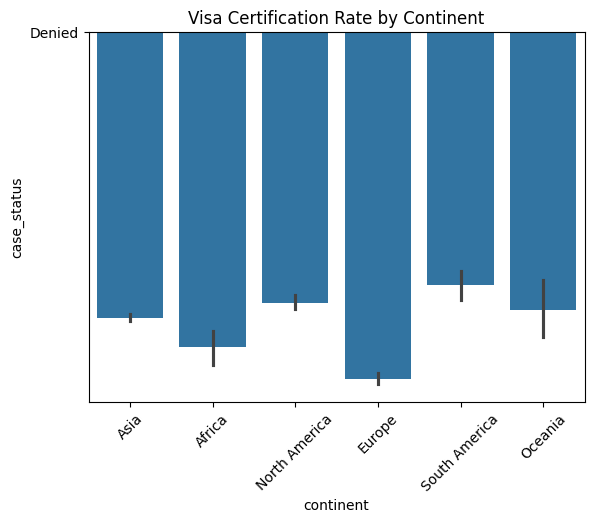

In [34]:
sns.barplot(x=df['continent'], y=df['case_status'])
plt.title("Visa Certification Rate by Continent")
plt.xticks(rotation=45)
plt.show()


Yes, visa approval rates vary by continent. Europe has the highest approval rate (~80%) South America has the lowest (~58%)

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

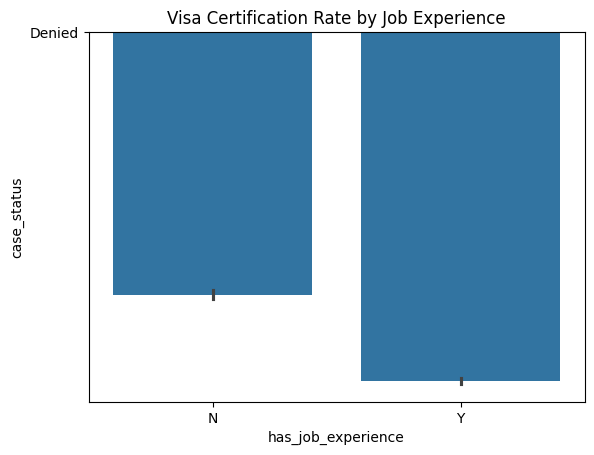

In [35]:
sns.barplot(x=df['has_job_experience'], y=df['case_status'])
plt.title("Visa Certification Rate by Job Experience")
plt.show()


 Yes. The bar chart shows a higher certification rate for applicants with job experience (~75%) compared to those without (~55%).

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

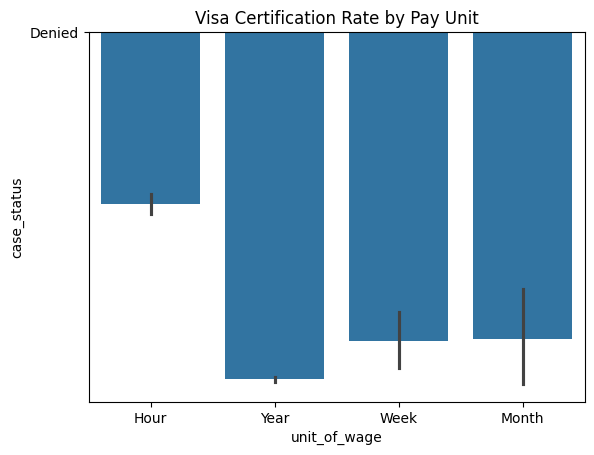

In [36]:
sns.barplot(x=df['unit_of_wage'], y=df['case_status'])
plt.title("Visa Certification Rate by Pay Unit")
plt.show()

Yearly salaries have the highest approval rate (~70%), while hourly wages have the lowest (~35%).

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

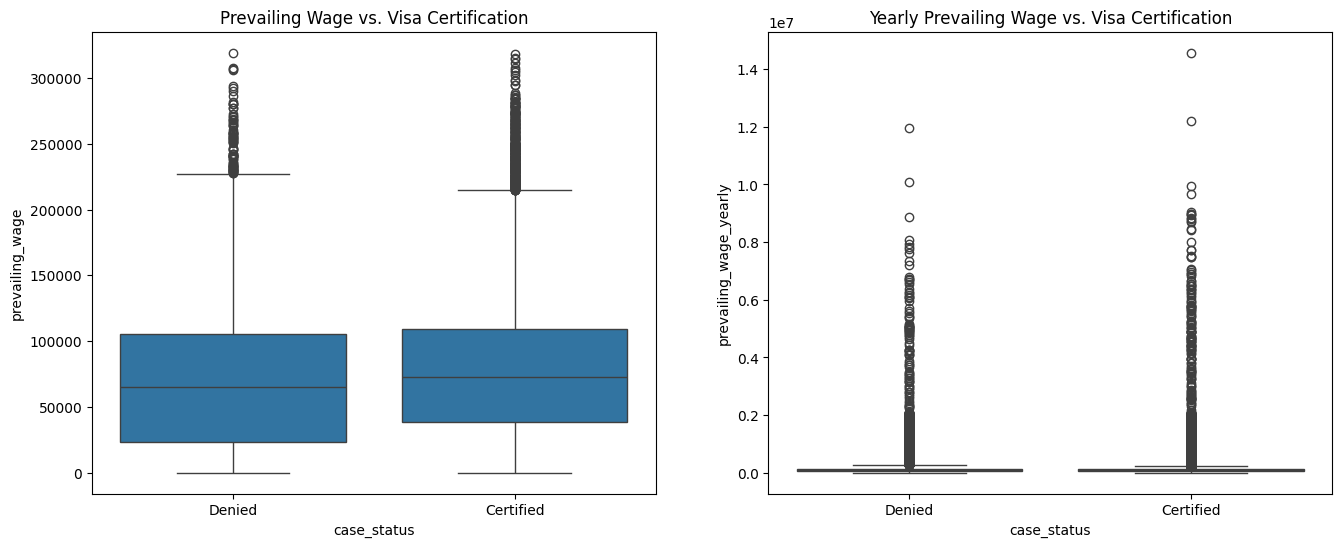

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(x=df['case_status'], y=df['prevailing_wage'], ax=ax[0])
ax[0].set_title("Prevailing Wage vs. Visa Certification")

sns.boxplot(x=df['case_status'], y=df['prevailing_wage_yearly'], ax=ax[1])
ax[1].set_title("Yearly Prevailing Wage vs. Visa Certification")

plt.show()

The boxplot shows little difference in wage distribution between approved and denied cases.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [38]:
df

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,prevailing_wage_yearly
0,Asia,High School,N,N,14513,2007,West,592.20,Hour,Y,Denied,1231782.03
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.65,Year,Y,Certified,83425.65
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.86,Year,Y,Denied,122996.86
3,Asia,Bachelor's,N,N,98,1897,West,83434.03,Year,Y,Denied,83434.03
4,Africa,Master's,Y,N,1082,2005,South,149907.39,Year,Y,Certified,149907.39
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified,77092.57
25476,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified,279174.79
25477,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified,146298.85
25478,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified,86154.77


#### Outlier Handling

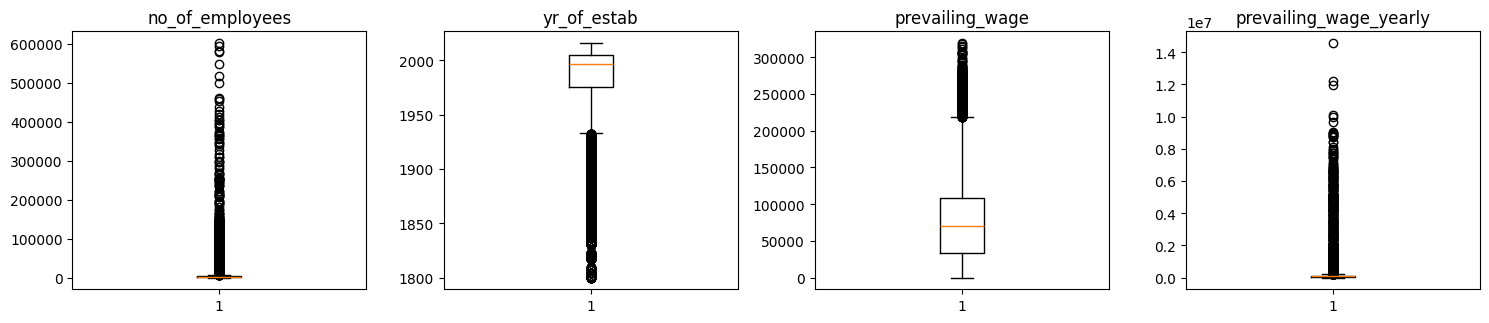

In [39]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [40]:
# Cap outliers at the 99th percentile for employees & wages
def cap_outliers(df, column):
    upper_limit = df[column].quantile(0.99)
    df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])

In [41]:
cap_outliers(df, 'no_of_employees')
cap_outliers(df, 'prevailing_wage')

In [42]:
# Apply log transformation to `prevailing_wage_yearly`
df['prevailing_wage_yearly'] = np.log1p(df['prevailing_wage_yearly'])  # log(1 + x) avoids log(0) issues

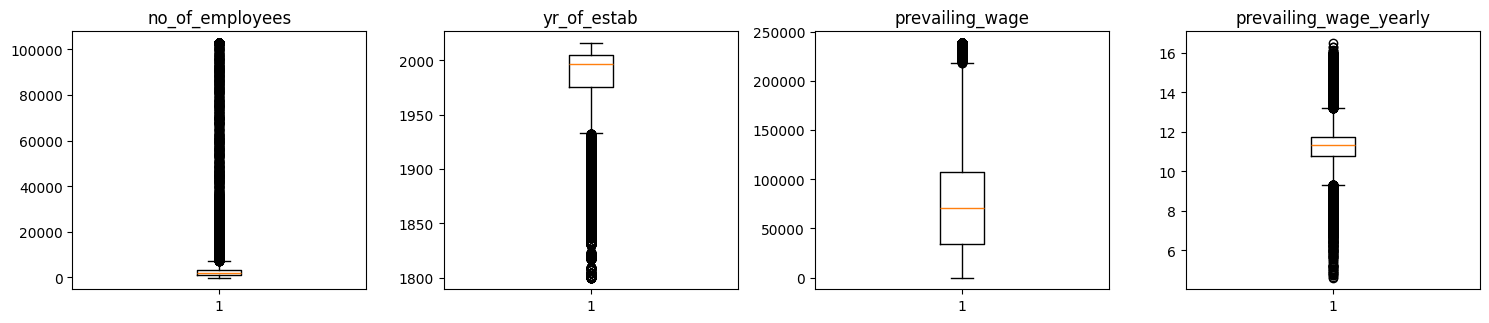

In [43]:
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [44]:
df.isnull().sum()

continent                 0
education_of_employee     0
has_job_experience        0
requires_job_training     0
no_of_employees           0
yr_of_estab               0
region_of_employment      0
prevailing_wage           0
unit_of_wage              0
full_time_position        0
case_status               0
prevailing_wage_yearly    0
dtype: int64

In [45]:
binary_cols = df.nunique()[df.nunique() == 2].keys().tolist()

for col in binary_cols:
    df[col] = df[col].map({'Y': 1, 'N': 0, 'Certified': 1, 'Denied': 0})

wage standarization, and dropping unit of wage

In [46]:
df.drop(['unit_of_wage', 'prevailing_wage'], axis=1, inplace=True)

One-hot encode categorical valriables

In [47]:
df = pd.get_dummies(df, columns=['continent', 'education_of_employee', 'region_of_employment','case_status'], drop_first=True)

Standarize Numerical Features

In [48]:
std_features = ['no_of_employees', 'prevailing_wage_yearly', 'yr_of_estab']
scaler = StandardScaler()
df[std_features] = scaler.fit_transform(df[std_features])

In [49]:
df

,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,full_time_position,prevailing_wage_yearly,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,case_status_1
0,0,0,0.71,0.65,1,2.31,True,False,False,False,False,False,True,False,False,False,False,True,False
1,1,0,-0.18,0.53,1,0.04,True,False,False,False,False,False,False,True,False,True,False,False,True
2,0,1,2.90,0.67,1,0.37,True,False,False,False,False,False,False,False,False,False,False,True,False
3,0,0,-0.35,-1.95,1,0.04,True,False,False,False,False,False,False,False,False,False,False,True,False
4,1,0,-0.28,0.60,1,0.54,False,False,False,False,False,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,1,1,-0.17,0.67,1,-0.02,True,False,False,False,False,False,False,False,False,False,True,False,True
25476,1,0,-0.12,0.63,1,1.06,True,False,False,False,False,False,True,False,False,True,False,False,True
25477,1,0,-0.27,-1.64,0,0.52,True,False,False,False,False,False,False,True,False,False,True,False,True
25478,1,1,-0.22,-2.18,1,0.07,True,False,False,False,False,False,False,True,False,False,False,True,True


Train and Test data

In [50]:
# Separating features and the target column
X = df.drop('case_status_1', axis=1)
y = df['case_status_1']

# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, shuffle=True)

Feature selection using random forest and XGboost or correlation to drop weak predictors

#### Feature Selection

##### Random Forest

In [51]:
# Train Random Forest only on training data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance scores
feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Select important features
selected_features = feature_importance[feature_importance > 0.01].index
 # Apply same feature selection to test set

X_train_selected_randomF = X_train[selected_features]
X_test_selected_randomF = X_test[selected_features] 

In [52]:
selected_features

Index(['prevailing_wage_yearly', 'no_of_employees', 'yr_of_estab',
       'education_of_employee_High School', 'has_job_experience',
       'education_of_employee_Master's', 'education_of_employee_Doctorate',
       'full_time_position', 'requires_job_training', 'continent_Europe',
       'continent_Asia', 'region_of_employment_Midwest',
       'region_of_employment_West', 'continent_North America'],
      dtype='object')

##### XGBoost

In [53]:
# Train XGBoost Model
xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.Series(xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Select important features
selected_features = feature_importance[feature_importance > 0.01].index

X_train_selected_XGB = X_train[selected_features]
X_test_selected_XGB = X_test[selected_features]

In [54]:
selected_features

Index(['education_of_employee_High School', 'education_of_employee_Doctorate',
       'continent_Europe', 'has_job_experience',
       'education_of_employee_Master's', 'region_of_employment_Midwest',
       'full_time_position', 'continent_South America',
       'region_of_employment_South', 'continent_North America',
       'region_of_employment_West', 'requires_job_training',
       'prevailing_wage_yearly', 'continent_Oceania',
       'region_of_employment_Northeast', 'continent_Asia', 'no_of_employees',
       'yr_of_estab'],
      dtype='object')

##### Feature Importance from both models

In [55]:
# Get feature importance from both models
rf_importance = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
xgb_importance = pd.Series(xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Merge results into a DataFrame for easy comparison
feature_importance_df = pd.DataFrame({'RandomForest': rf_importance, 'XGBoost': xgb_importance})

# Normalize scores (optional, helps compare across models)
feature_importance_df = feature_importance_df / feature_importance_df.max()

# Sort by highest average importance
feature_importance_df['Average'] = feature_importance_df.mean(axis=1)
feature_importance_df = feature_importance_df.sort_values(by='Average', ascending=False)

In [56]:
print(feature_importance_df)

                                   RandomForest  XGBoost  Average
education_of_employee_High School          0.23     1.00     0.62
prevailing_wage_yearly                     1.00     0.08     0.54
no_of_employees                            0.90     0.06     0.48
yr_of_estab                                0.73     0.06     0.40
has_job_experience                         0.17     0.40     0.29
education_of_employee_Doctorate            0.06     0.50     0.28
continent_Europe                           0.05     0.40     0.23
education_of_employee_Master's             0.13     0.25     0.19
region_of_employment_Midwest               0.04     0.20     0.12
full_time_position                         0.05     0.15     0.10
region_of_employment_South                 0.03     0.13     0.08
continent_South America                    0.02     0.14     0.08
requires_job_training                      0.05     0.10     0.08
continent_North America                    0.04     0.11     0.07
region_of_

Dropping weak predictors and re running models

In [57]:
drop_features = [
    "full_time_position",
    "requires_job_training",
    "region_of_employment_South",
    "continent_South America",
    "continent_North America",
    "region_of_employment_West",
    "region_of_employment_Northeast",
    "continent_Asia",
    "continent_Oceania"
]

Dropping the weak predictors will be held off to see how they affect the performance of the model

In [58]:
#X_train.drop(drop_features, axis=1, inplace=True)
#X_test.drop(drop_features, axis=1, inplace=True)

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [65]:
numeric_columns = X_train.select_dtypes(include=np.number).columns.tolist()
bool_columns = X_train.select_dtypes(include=bool).columns.tolist()

## Building bagging and boosting models

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost:

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

In [ ]:
# Define models & hyperparameter grids
models = {
    "Bagging": (BaggingClassifier(random_state=1), {
        'max_samples': [0.8,0.9,1],
        'max_features': [0.7,0.8,0.9],
        'n_estimators' : [30,50,70],
    }),
    "RandomForest": (RandomForestClassifier(random_state=1), {
        "n_estimators": [50,110,25],
        "min_samples_leaf": np.arange(1, 4),
        "max_features": ['sqrt'],
        "max_samples": np.arange(0.4, 0.7, 0.1)
    }),
    "GradientBoosting": (GradientBoostingClassifier(random_state=1), {
        "n_estimators": np.arange(50,110,25),
        "learning_rate": [0.01,0.1,0.05],
        "subsample": [0.7,0.9],
        "max_features": [0.5,0.7,1],
    }),
    "AdaBoost": (AdaBoostClassifier(random_state=1), {
        "n_estimators": np.arange(50,110,25),
        "learning_rate": [0.01,0.1,0.05],
        "base_estimator": [
            DecisionTreeClassifier(max_depth=2, random_state=1),
            DecisionTreeClassifier(max_depth=3, random_state=1),
        ],
    }),
    "XGBoost": (XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss'), {
        'n_estimators': np.arange(50,110,25),
        'scale_pos_weight': [1,2,5],
        'learning_rate': [0.01,0.1,0.05],
        'gamma': [1,3],
        'subsample': [0.7,0.9]
    })
}

# Train each model with GridSearchCV
best_models = {}

for model_name, (model, param_grid) in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

    print(f"Best Accuracy: {grid_search.best_score_}\n")

    

Training Bagging...
Best parameters for Bagging: {'max_features': 0.8, 'max_samples': 0.8, 'n_estimators': 70}
Best Accuracy: 0.7284710511602838

Training RandomForest...
Best parameters for RandomForest: {'max_features': 'sqrt', 'max_samples': np.float64(0.4), 'min_samples_leaf': np.int64(3), 'n_estimators': 110}
Best Accuracy: 0.7425435215415518

Training GradientBoosting...
Best parameters for GradientBoosting: {'learning_rate': 0.1, 'max_features': 0.5, 'n_estimators': np.int64(75), 'subsample': 0.7}
Best Accuracy: 0.7437208684345448

Training AdaBoost...


ValueError: Invalid parameter 'base_estimator' for estimator AdaBoostClassifier(random_state=1). Valid parameters are: ['algorithm', 'estimator', 'learning_rate', 'n_estimators', 'random_state'].

##  Will tuning the hyperparameters improve the model performance?

## Model Performance Comparison and Conclusions

## Actionable Insights and Recommendations